<a href="https://colab.research.google.com/github/lourencocavalcante/Neurocomputacao/blob/main/CAP351_Projeto_01_Preparacao_do_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" align="middle">](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 500 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


---


# **CAP-351 Neurocomputação**

**Professor:**

* Dr. Marcos Goncalves Quiles

**Aluno:**
* Lourenço José Cavalcante Neto

# PROPOSTA DE PROJETO 1:

# REDE MLP:: Multi-layer Perceptron (MLP)

1. Selecionar dois datasets (não triviais)

  * Um dataset para classificação
  * Um dataset para regressão
  * Separar em treino/validação/teste

2. Treinar modelos MLP para os dois problemas

3. Considerar:
  * Diferentes topologias (>=5 topologias, variar número de
camadas)
  * Usar o algoritmo original SGD (não usar algoritmos otimizados,
e.g. ADAM)
  * Avaliar o impacto do uso do Momentum
  * Avaliar o impacto do uso da regularização (i.e. L2)

4. Ilustrar graficamente a evolução do treinamento (treino/validação).

5. Confeccionar um relatório (reprodutível) contendo os
experimentos e resultados

**Bibliotecas**

In [ ]:
import pandas as pd

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math

import datetime
print(tf.__version__)

2.8.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Dataset**

Importando os dados do **disdrômetro RD80 (Joss**)


In [ ]:
#CRIANDO O DATAFRAME
#Dados do disdrômetro RD80. Chamado comumente de Joss. 
#Este equipamento mede a distribuição das gotas de chuva que chegam à superfície.
df_rd80_joss = pd.read_table('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/JWD_campina_report_RZLwcDmDtNdrop_b2.1_report.txt',header=None,delim_whitespace=True)


In [ ]:
df_rd80_joss.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2020.0,3.0,17.0,13.0,52.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020.0,3.0,17.0,13.0,53.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020.0,3.0,17.0,13.0,54.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020.0,3.0,17.0,13.0,55.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020.0,3.0,17.0,13.0,56.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print('Tamanho do dataset: ',df_rd80_joss.shape[0], ', quantiade de atributos: ', df_rd80_joss.shape[1])

Tamanho do dataset:  315420 , quantiade de atributos:  31


In [ ]:
#Vamos adicionar os títulos das colunas:
df_rd80_joss.columns = ['Ano (YYYY)', 'Mes', 'dia', 'H', 'M', 'S','Rain Intensity (mm/h)', 'radar reflectivity (1/mm6m3)','Liquid watercontent (g/m3)',
'Mean weight diameter(mm)', 'Time integration (s)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)']


In [ ]:
#Modificanto o tipo de dado das colunas referentes a Data e Horário para Inteiro(int) e do Rain Intensity (mm/h) para (float)
df_rd80_joss[['Ano (YYYY)', 'Mes', 'dia', 'H', 'M', 'S']] = df_rd80_joss[['Ano (YYYY)', 'Mes', 'dia', 'H', 'M', 'S']].astype(int)
#df_rd80_joss['Rain Intensity (mm/h)'] = df_rd80_joss['Rain Intensity (mm/h)'].astype(float)

In [ ]:
cont = df_rd80_joss.shape[0]
for index, row in df_rd80_joss.iterrows():
  #ano = '20' + str(int(row['Ano (YYYY)']))
  ano = str(int(row['Ano (YYYY)']))
  mes = '%02d' % int(row['Mes'])
  dia = '%02d' % int(row['dia'])
  h = '%02d' % int(row['H'])
  m = '%02d' % int(row['M'])
  s = '%02d' % int(row['S'])
    

  #print(mes)
  df_rd80_joss.loc[index, 'Data'] = str(ano) + '-' + str(mes) + '-'+ str(dia)
  df_rd80_joss.loc[index, 'Hora'] = str(h) + ':' + str(m) + ':'+ str(s)
  cont = cont - 1
  print(cont)

In [ ]:
df_rd80_joss.head()

,Ano (YYYY),Mes,dia,H,M,S,Rain Intensity (mm/h),radar reflectivity (1/mm6m3),Liquid watercontent (g/m3),Mean weight diameter(mm),...,N(D),N(D),N(D),N(D),N(D),N(D),N(D),N(D),N(D),N(D)
0,2020.0,3.0,17.0,13.0,52.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020.0,3.0,17.0,13.0,53.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020.0,3.0,17.0,13.0,54.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020.0,3.0,17.0,13.0,55.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020.0,3.0,17.0,13.0,56.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_rd80_joss['Datetime'] = df_rd80_joss[['dia','Mes','Ano (YYYY)', 'H', 'M', 'S']].apply(lambda row:
                    datetime.datetime(year=row['Ano (YYYY)'], month=row['Mes'],day=row['dia'], hour=row['H'], minute=row["M"], second=row["S"]),axis=1)

df_rd80_joss = df_rd80_joss.drop(columns=['Ano (YYYY)', 'Mes', 'dia', 'H', 'M', 'S','N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)', 'N(D)'])
df_rd80_joss = df_rd80_joss.set_index('Datetime')
df_rd80_joss.sort_values('Datetime',ascending=True,inplace=True)
df_rd80_joss.head()

,Rain Intensity (mm/h),radar reflectivity (1/mm6m3),Liquid watercontent (g/m3),Mean weight diameter(mm),Time integration (s)
Datetime,,,,,
2020-03-17 13:52:00,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:53:00,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:54:00,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:55:00,0.0,0.0,0.0,0.0,60.0
2020-03-17 13:56:00,0.0,0.0,0.0,0.0,60.0


In [ ]:
#Vamos assumir que os valores para Rain Intensity (mm/h) que forem menores que 0.1 sejam considerados como 0(zero)
df_rd80_joss['Rain Intensity (mm/h)'][df_rd80_joss['Rain Intensity (mm/h)'] < 0.1] = 0

In [ ]:
#Vamos exportar o Dataframe para o formato CSV
df_rd80_joss.to_csv('/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/df_final_rd80_joss.csv')

In [ ]:
#Carregando o Dataset CSV
df_rd80_joss = pd.read_csv("/content/drive/MyDrive/MestradoCAP/Lourenco/cap351/Datasets/df_final_rd80_joss.csv")
df_rd80_joss = pd.DataFrame(df_rd80_joss)

In [ ]:
df_rd80_joss.isna().sum()

In [ ]:
df_rd80_joss.dropna(inplace=True)
df_rd80_joss.reset_index(inplace=True, drop=True)

In [ ]:
df_rd80_joss.head()

,Datetime,Rain Intensity (mm/h),radar reflectivity (1/mm6m3),Liquid watercontent (g/m3),Mean weight diameter(mm),Time integration (s)
0,2020-03-17 13:52:00,0.0,0.0,0.0,0.0,60.0
1,2020-03-17 13:53:00,0.0,0.0,0.0,0.0,60.0
2,2020-03-17 13:54:00,0.0,0.0,0.0,0.0,60.0
3,2020-03-17 13:55:00,0.0,0.0,0.0,0.0,60.0
4,2020-03-17 13:56:00,0.0,0.0,0.0,0.0,60.0


In [ ]:
df_rd80_joss.describe()

,Rain Intensity (mm/h),radar reflectivity (1/mm6m3),Liquid watercontent (g/m3),Mean weight diameter(mm),Time integration (s)
count,315420.000000,315420.000000,315420.000000,315420.000000,315420.0
mean,0.372430,309.362454,0.018214,0.114891,60.0
std,3.418582,4704.699349,0.147274,0.356634,0.0
min,0.000000,0.000000,0.000000,0.000000,60.0
25%,0.000000,0.000000,0.000000,0.000000,60.0
50%,0.000000,0.000000,0.000000,0.000000,60.0
75%,0.000000,0.000000,0.000000,0.000000,60.0
max,128.895370,550486.250000,4.893830,5.361310,60.0


In [ ]:
corr = df_rd80_joss.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 14}, square=True);

In [ ]:
# Separar dados de treinamento

## Split Train datetime Year=2014, Month=01 Day = 01 Hour=01
split_date = datetime.datetime(year=2021, month=12 ,day=4, hour=0)

df_train_rd80_joss = df_rd80_joss.loc[df_rd80_joss['Datetime']<split_date]

df_val_rd80_joss = df_rd80_joss.loc[df_rd80_joss['Datetime']>=split_date]

print('Tamanho do dataset para treinamento: ',df_train_rd80_joss.shape[0])
print('Tamanho do dataset para validação: ',df_val_rd80_joss.shape[0])
df_val_rd80_joss.reset_index(drop=True, inplace=True)

[]

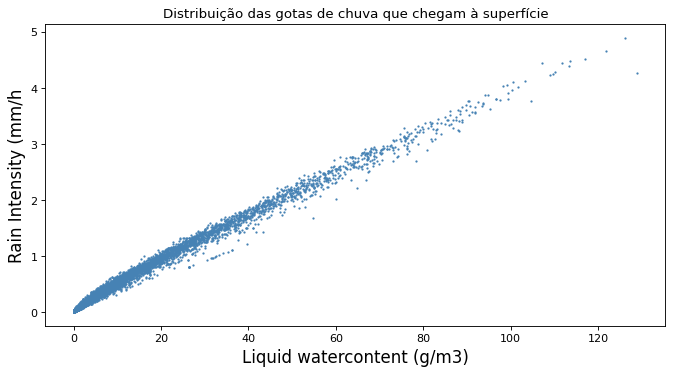

In [ ]:
figure(figsize=(10,5),dpi=80)
plt.scatter(df_rd80_joss['Rain Intensity (mm/h)'] ,df_rd80_joss['Liquid watercontent (g/m3)'],s=1, color='#4682B4')
plt.xlabel(r'Liquid watercontent (g/m3)',size=15)
plt.ylabel(r'Rain Intensity (mm/h',size=15)
plt.title("Distribuição das gotas de chuva que chegam à superfície")
plt.plot()

63084
252336


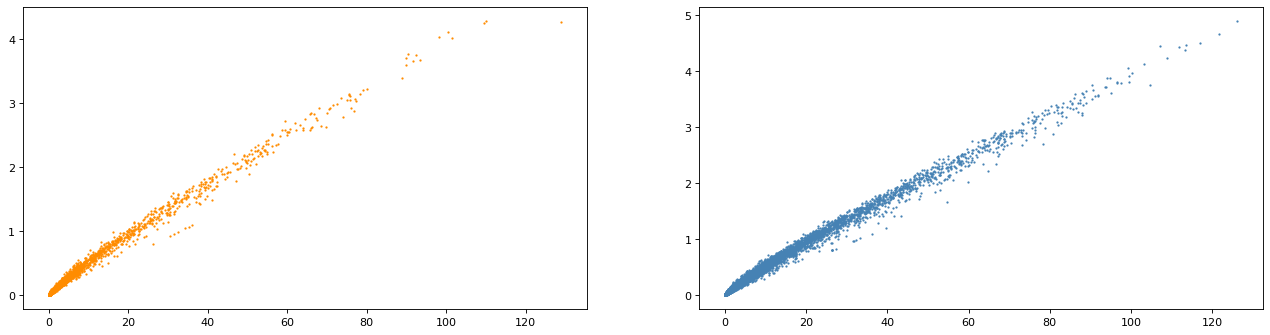

In [ ]:
#Divisão do Dataset em treinamento e validação
x_train, x_test, y_train, y_test = train_test_split(df_rd80_joss['Rain Intensity (mm/h)'] ,df_rd80_joss['Liquid watercontent (g/m3)'], test_size=0.8)
print(len(x_train))
print(len(x_test))
figure(figsize=(20,5),dpi=80)
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, color='#FF8C00',s=1)
plt.subplot(1,2,2)
plt.scatter(x_test, y_test, color='#4682B4',s=1)
plt.show()